<a href="https://colab.research.google.com/github/inputJun/MachineLearning-Study/blob/main/2022%EB%85%841%ED%95%99%EA%B8%B0%EB%93%9C%EB%A1%A0%EA%B3%BC%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_201700846%EA%B3%A0%EC%A4%80%ED%99%98_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**201700846 고준환**

**고정익과 회전익 기체 제원 데이터 받아오기**
- FixedWing.csv, MultiCopter.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Drone_fixed = pd.read_csv("FixedWing.csv")
Drone_fixed.head()

,Company,Name,Length,Width,Weight
0,XK,A100 SU27,420,340,65
1,Samco,DUODRONE,1400,2200,3200
2,Uconsystem,RemoM-002,1440,1800,3500
3,Suewon Unmanned Tech,SCANNER,1200,2600,5000
4,KEVA Drone,KD-2 MAPPER,1100,1800,2000


In [ ]:
Drone_fixed.columns

Index(['Company', 'Name', 'Length', 'Width', 'Weight'], dtype='object')

In [ ]:
Drone_multi = pd.read_csv("MultiCopter.csv")
Drone_multi.head()

,Company,Name,Length,Width,Height,Weight
0,DJI,MAVIC 2 ZOOM,322.0,242.0,84.0,905
1,DJI,MAVIC 2 PRO,322.0,242.0,84.0,907
2,DJI,PHANTOM 4 PRO,289.5,289.5,196.0,1375
3,DJI,SPARK,143.0,143.0,55.0,300
4,DJI,INSPIRE 2,427.0,317.0,425.0,3440


In [ ]:
Drone_multi.columns

Index(['Company', 'Name', 'Length', 'Width', 'Height', 'Weight'], dtype='object')

**csv 파일에서 고정익 / 회전익의 전장(Length), 무게(Weight)값을 추출한 후 리스트 생성**

고정익의 전장

In [ ]:
fixed_length_list = []
for i in Drone_fixed["Length"] :
  fixed_length_list.append(i)
print(fixed_length_list)

[420, 1400, 1440, 1200, 1100, 1132, 1000, 1500, 580, 2600, 3200, 1200, 1070, 1270, 1460, 1070, 1637, 1100, 855, 1045, 990, 1030, 1045, 980, 1075, 405, 620, 1170]


고정익의 무게

In [ ]:
fixed_weight_list = []
for i in Drone_fixed["Weight"] :
  fixed_weight_list.append(i)
print(fixed_weight_list)

[65, 3200, 3500, 5000, 2000, 1050, 6000, 15000, 750, 10000, 21500, 9000, 4200, 2750, 17000, 5000, 3780, 2750, 830, 1100, 1700, 760, 1250, 1540, 7100, 300, 650, 1500]


회전익의 전장

In [ ]:
multi_length_list = []
for i in Drone_multi["Length"] :
  multi_length_list.append(i)
print(multi_length_list)

[322.0, 322.0, 289.5, 143.0, 427.0, 1460.0, 400.0, 1940.0, 1860.0, 365.0, 1974.0, 1590.0, 730.0, 1002.0, 204.0, 305.0, 159.0, 1800.0, 860.0, 1140.0, 1225.0, 350.0, 1000.0, 1100.0, 643.0, 535.0, 330.0, 1000.0, 360.0, 2123.0]


회전익의 무게

In [ ]:
multi_weight_list = []
for i in Drone_multi["Weight"] :
  multi_weight_list.append(i)
print(multi_weight_list)

[905, 907, 1375, 300, 3440, 9700, 147, 14900, 17100, 992, 18320, 18500, 1434, 5500, 790, 945, 249, 13800, 9700, 9400, 15000, 1400, 13100, 13500, 5250, 7600, 1200, 10200, 850, 18800]


고정익과 회전익의 전장 리스트 합치기

In [ ]:
drone_length = []
drone_length.extend(fixed_length_list)
drone_length.extend(multi_length_list)
print(drone_length)

[420, 1400, 1440, 1200, 1100, 1132, 1000, 1500, 580, 2600, 3200, 1200, 1070, 1270, 1460, 1070, 1637, 1100, 855, 1045, 990, 1030, 1045, 980, 1075, 405, 620, 1170, 322.0, 322.0, 289.5, 143.0, 427.0, 1460.0, 400.0, 1940.0, 1860.0, 365.0, 1974.0, 1590.0, 730.0, 1002.0, 204.0, 305.0, 159.0, 1800.0, 860.0, 1140.0, 1225.0, 350.0, 1000.0, 1100.0, 643.0, 535.0, 330.0, 1000.0, 360.0, 2123.0]


고정익과 회전익의 무게 리스트 합치기

In [ ]:
drone_weight = []
drone_weight.extend(fixed_weight_list)
drone_weight.extend(multi_weight_list)
print(drone_weight)

[65, 3200, 3500, 5000, 2000, 1050, 6000, 15000, 750, 10000, 21500, 9000, 4200, 2750, 17000, 5000, 3780, 2750, 830, 1100, 1700, 760, 1250, 1540, 7100, 300, 650, 1500, 905, 907, 1375, 300, 3440, 9700, 147, 14900, 17100, 992, 18320, 18500, 1434, 5500, 790, 945, 249, 13800, 9700, 9400, 15000, 1400, 13100, 13500, 5250, 7600, 1200, 10200, 850, 18800]


**넘파이 배열로 전환**

In [ ]:
drone_data = np.column_stack((drone_length, drone_weight))
print(drone_data)

[[  420.     65. ]
 [ 1400.   3200. ]
 [ 1440.   3500. ]
 [ 1200.   5000. ]
 [ 1100.   2000. ]
 [ 1132.   1050. ]
 [ 1000.   6000. ]
 [ 1500.  15000. ]
 [  580.    750. ]
 [ 2600.  10000. ]
 [ 3200.  21500. ]
 [ 1200.   9000. ]
 [ 1070.   4200. ]
 [ 1270.   2750. ]
 [ 1460.  17000. ]
 [ 1070.   5000. ]
 [ 1637.   3780. ]
 [ 1100.   2750. ]
 [  855.    830. ]
 [ 1045.   1100. ]
 [  990.   1700. ]
 [ 1030.    760. ]
 [ 1045.   1250. ]
 [  980.   1540. ]
 [ 1075.   7100. ]
 [  405.    300. ]
 [  620.    650. ]
 [ 1170.   1500. ]
 [  322.    905. ]
 [  322.    907. ]
 [  289.5  1375. ]
 [  143.    300. ]
 [  427.   3440. ]
 [ 1460.   9700. ]
 [  400.    147. ]
 [ 1940.  14900. ]
 [ 1860.  17100. ]
 [  365.    992. ]
 [ 1974.  18320. ]
 [ 1590.  18500. ]
 [  730.   1434. ]
 [ 1002.   5500. ]
 [  204.    790. ]
 [  305.    945. ]
 [  159.    249. ]
 [ 1800.  13800. ]
 [  860.   9700. ]
 [ 1140.   9400. ]
 [ 1225.  15000. ]
 [  350.   1400. ]
 [ 1000.  13100. ]
 [ 1100.  13500. ]
 [  643.   5

**고정익을 1, 회전익을 0으로 설정하여 target값 설정**

In [ ]:
drone_target = np.concatenate((np.ones(len(fixed_length_list)), np.zeros(len(multi_length_list))))
print(drone_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**사이킷런으로 훈련 세트 / 테스트 세트 나누기**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    drone_data, drone_target, stratify=drone_target, random_state=42)

In [ ]:
print(test_target)

[0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


**k-최근접 이웃 알고리즘**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.7333333333333333

knn으로 전장 1500, 무게 15000인 드론 예측

In [ ]:
print(kn.predict([[1500, 15000]]))

[0.]


In [ ]:
distances, indexes = kn.kneighbors([[1500, 15000]])

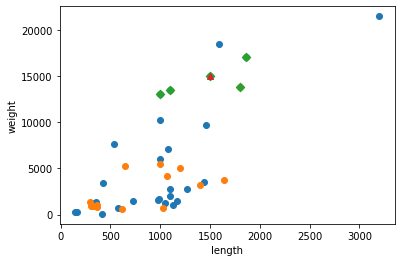

In [ ]:
plt.scatter(train_input[:len(fixed_length_list)+1,0], train_input[:len(fixed_length_list)+1,1])
plt.scatter(train_input[len(fixed_length_list)+1:,0], train_input[len(fixed_length_list)+1:,1])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.scatter(1500, 15000, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**데이터 전처리**

In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print(mean, std)

[ 954.68604651 4983.53488372] [ 577.46064019 5566.2009772 ]


In [ ]:
train_scaled = (train_input - mean) / std

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

0.7333333333333333

In [ ]:
new = ([1500, 15000] - mean) / std

전처리 데이터로 훈련한 모델에서 전장 1500, 무게 15000 인 드론 예측

In [ ]:
print(kn.predict([new]))

[0.]


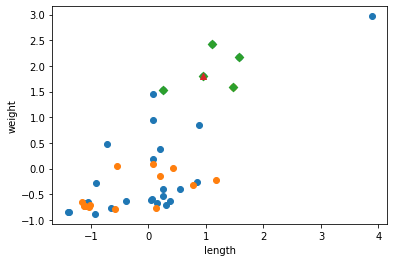

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:len(fixed_length_list)+1,0], train_scaled[:len(fixed_length_list)+1,1])
plt.scatter(train_scaled[len(fixed_length_list)+1:,0], train_scaled[len(fixed_length_list)+1:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **결론**

**전장 1500, 무게 15000인 드론을 전처리 전의 데이터로 훈련한 k-최근접 이웃 객체에서도 회전익, 전처리 후의 데이터로 훈련한 k-최근접 이웃 객체에서도 회전익으로 예상을 한다.**
그러나 전처리 전과 후의 이웃한 인덱스 값에서는 변화가 발생한 것을 확인할 수 있다. 